# Sentiment Analysis and Prediction of Review Ratings on the Yelp Reviews Dataset using various Machine Learning Algorithms
Dataset Information: <br>
(1). Dataset:
    *   Column 1 - Unique Business ID
    *   Column 2 - Date of Review
    *   Column 3 - Review ID
    *   Column 4 - Stars given by the user
    *   Column 5 - Review given by the user
    *   Column 6 - Type of text entered - Review
    *   Column 7 - Unique User ID
    *   Column 8 - Cool column: The number of cool votes the review received
    *   Column 9 - Useful column: The number of useful votes the review received
    *   Column 10 - Funny Column: The number of funny votes the review received <br>
(2). Number of entries - 10000

**(1). Importing all the necessary modules:**

In [1]:
!pip install sklearn

# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection  import GridSearchCV
%matplotlib inline

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**(2). Loading and seeing the dataset details:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('/content/drive/MyDrive/dataset/HomeworkData.csv')
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
# COLUMN NAMES
print("Column names:")
print(data.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())
# DATASET SUMMARY
data.describe(include='all')

Shape of the dataset:
(9000, 10)
Column names:
Index(['Unnamed: 0', 'funny', 'useful', 'review_id', 'text', 'business_id',
       'stars', 'date', 'user_id', 'cool'],
      dtype='object')
Datatype of each column:
Unnamed: 0       int64
funny            int64
useful           int64
review_id       object
text            object
business_id     object
stars          float64
date            object
user_id         object
cool             int64
dtype: object
Few dataset entries:
   Unnamed: 0  funny  useful  ...                 date                 user_id cool
0     6777212      0       0  ...  2019-11-04 21:06:52  ZoTtuB-wnvBfXzaUTsO3VA    1
1     3379384      0       2  ...  2012-01-03 00:52:15  3TOA8aDpcnIzRLrdFnRH8g    0
2     1850541      0       1  ...  2017-06-10 14:43:33  Wvoed2OsoqUtEo4CDG8UTQ    0
3     3044453      0       1  ...  2018-11-04 20:20:01  Jo1xHUk8ZLIl5_B_ceKVzQ    2
4      734368      0       4  ...  2017-09-05 16:27:45  ZOrsBoLXBAZTXFGepnR-JQ    0

[5 rows x 10 col

,Unnamed: 0,funny,useful,review_id,text,business_id,stars,date,user_id,cool
count,9.000000e+03,9000.000000,9000.000000,9000,9000,9000,9000.000000,9000,9000,9000.000000
unique,NaN,NaN,NaN,9000,9000,7719,NaN,9000,8776,NaN
top,NaN,NaN,NaN,whYha0v0CJ-PaeL7xRLrDw,***GLUTEN-FREE REVIEW***\n\nChocolate torte = ...,n73rxa6e6-fTIxQzfv4BuA,NaN,2012-04-02 14:46:43,RtGqdDBvvBCjcu5dUqwfzA,NaN
freq,NaN,NaN,NaN,1,1,11,NaN,1,9,NaN
mean,4.340634e+06,0.424000,1.302000,NaN,NaN,NaN,3.720444,NaN,NaN,0.510667
std,2.486885e+06,1.965194,3.622189,NaN,NaN,NaN,1.461916,NaN,NaN,2.308398
min,1.232000e+03,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,2.218756e+06,0.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000
50%,4.286124e+06,0.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
75%,6.517016e+06,0.000000,1.000000,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000


**(3). Creating of a new column:**<br>
The new column will be - "length". This column will hold the data of the word length of the review.

In [9]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,Unnamed: 0,funny,useful,review_id,text,business_id,stars,date,user_id,cool,length
0,6777212,0,0,OsR6xN1mwVeskPVsLnxXLw,Amazing spot for some killer paella. Portion i...,qJxjhLQjLcYnpcqqDHS3Jg,4.0,2019-11-04 21:06:52,ZoTtuB-wnvBfXzaUTsO3VA,1,550
1,3379384,0,2,YjXjrzmi_shf-MQiCKW0dw,Just a touch below average.\n\nThe breat is ta...,Bs7IwMmM7FUHG0noFaDRJg,2.0,2012-01-03 00:52:15,3TOA8aDpcnIzRLrdFnRH8g,0,326
2,1850541,0,1,W3MtryfAAdOn8QX7x7uikQ,"I love this food cart. Fresh, spicy, savory de...",QFDV9pRaH67U_EkuxMaRvA,5.0,2017-06-10 14:43:33,Wvoed2OsoqUtEo4CDG8UTQ,0,300
3,3044453,0,1,d4IWLHSjkdOa0jFmLXLE8g,An Atlanta native I regret to say today was my...,U-i6cq-yFRVJC4pIKSLX9Q,5.0,2018-11-04 20:20:01,Jo1xHUk8ZLIl5_B_ceKVzQ,2,1731
4,734368,0,4,6LxQmL8t-RPr_IoZAGuzAA,I called and made an appointment for an oil ch...,skEgDeD0qDBzqpqsuh0wtQ,1.0,2017-09-05 16:27:45,ZOrsBoLXBAZTXFGepnR-JQ,0,404


**(4). Visualization:**<br>
Let us now visualize the if there is any correlation between stars and the length of the review.

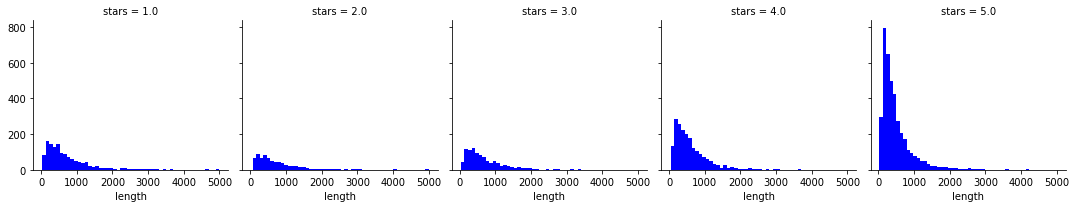

In [20]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

**(5). Mean Value of the Vote columns**
There are 3 voting columns for the reviews - funny, cool and useful. Let us now find the mean values with respect to the stars given to the review.

In [9]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,Unnamed: 0,funny,useful,cool,length
stars,,,,,
1.0,4.325283e+06,0.545455,2.169797,0.203606,756.856499
2.0,4.450705e+06,0.608522,1.616511,0.350200,795.901465
3.0,4.326413e+06,0.476190,1.218845,0.491388,708.003040
4.0,4.247292e+06,0.468193,1.148092,0.728244,611.129262
5.0,4.374729e+06,0.313414,1.048159,0.541099,497.331316


**(6). Correlation between the voting columns:** <br>
Let us now see what the correlation is between the three voting columns.

In [10]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,Unnamed: 0,funny,useful,cool,length
Unnamed: 0,1.000000,0.259834,0.183109,-0.521861,0.319661
funny,0.259834,1.000000,0.687750,-0.545444,0.961977
useful,0.183109,0.687750,1.000000,-0.884122,0.728914
cool,-0.521861,-0.545444,-0.884122,1.000000,-0.677709
length,0.319661,0.961977,0.728914,-0.677709,1.000000


Thus, we can see that there is negative correlation between:
    * Cool and Useful
    * Cool and Funny
    * Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.<br>
Whereas, there is a positive correlation between:
    * Funny and Useful    
    * Funny and Length
    * Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

**(7). Classifying the dataset and splitting it into the reviews and stars:**

In [12]:
# CLASSIFICATION
data_classes = data[(data['stars']==1)| (data['stars']==2) | (data['stars']==3) | (data['stars']==4) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(9000, 11)
0    Amazing spot for some killer paella. Portion i...
1    Just a touch below average.\n\nThe breat is ta...
2    I love this food cart. Fresh, spicy, savory de...
3    An Atlanta native I regret to say today was my...
4    I called and made an appointment for an oil ch...
Name: text, dtype: object
0    4.0
1    2.0
2    5.0
3    5.0
4    1.0
Name: stars, dtype: float64


**(8). Data Cleaning:** <br>
We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [13]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**(9). Vectorization**<br>
We will now vectorize a single review and see the results:

In [15]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

37311
Amazing spot for some killer paella. Portion is absolutely perfect, make sure to share it. Unless you plan on saving some for later! I would definitely come back here. The ceviche was pretty yummy too. Had the red snapper, portion size for that i would say can use a little more love. Especially when you are usually sharing an app. Lesson learned ill just order an extra next time. The only thing i would say is that the place had a bit of an old basement smell to it but other than that everything was yummy. Oh and dont forget to try some oysters!
  (0, 1488)	1
  (0, 4768)	1
  (0, 7484)	1
  (0, 8993)	1
  (0, 9786)	1
  (0, 12721)	1
  (0, 13650)	1
  (0, 14407)	1
  (0, 14910)	1
  (0, 15136)	1
  (0, 15510)	1
  (0, 16775)	1
  (0, 17551)	1
  (0, 18907)	1
  (0, 19654)	1
  (0, 20584)	1
  (0, 20830)	1
  (0, 21632)	1
  (0, 23745)	1
  (0, 24743)	1
  (0, 25004)	1
  (0, 25082)	1
  (0, 25362)	1
  (0, 25542)	1
  (0, 25721)	1
  :	:
  (0, 27722)	1
  (0, 28031)	1
  (0, 28068)	1
  (0, 28512)	1
  (0, 2

**(10). Vectorization of the whole review set and and checking the sparse matrix:**

In [16]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (9000, 37311)
Non-Zero occurences:  447753
Density of the matrix =  0.13333958707441057


**(11). Splitting the dataset X into training and testing set:**

In [17]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

**(12). Modelling:**<br>
We will now use multiple Machine Algorithms to see which gives the best performance.

(1). Multinomial Naive Bayes - We are using Multinomial Naive Bayes over Gaussian because with sparse data, Gaussian Naive Bayes assumptions aren't met and a simple gaussian fit over the data will not give us a good fit or prediction!

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

(2). Random Forest Classifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

(3). Decision Tree

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 74  12   7  18  30]
 [ 11   5  13  18  23]
 [ 10   8  22  27  30]
 [ 12  14  28  46  90]
 [ 28  15  16  70 273]]
Score: 46.67
Classification Report:               precision    recall  f1-score   support

         1.0       0.55      0.52      0.54       141
         2.0       0.09      0.07      0.08        70
         3.0       0.26      0.23      0.24        97
         4.0       0.26      0.24      0.25       190
         5.0       0.61      0.68      0.64       402

    accuracy                           0.47       900
   macro avg       0.35      0.35      0.35       900
weighted avg       0.45      0.47      0.46       900



(4). Support Vector Machines

In [19]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 96   2   6   3  34]
 [ 21   3  11   9  26]
 [ 10   1   8  43  35]
 [  5   0   3  60 122]
 [  9   1   0  21 371]]
Score: 59.78
Classification Report:               precision    recall  f1-score   support

         1.0       0.68      0.68      0.68       141
         2.0       0.43      0.04      0.08        70
         3.0       0.29      0.08      0.13        97
         4.0       0.44      0.32      0.37       190
         5.0       0.63      0.92      0.75       402

    accuracy                           0.60       900
   macro avg       0.49      0.41      0.40       900
weighted avg       0.55      0.60      0.54       900



(5). Gradient Boosting Classifier

In [18]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 84  12   6   7  32]
 [ 22   4  14   9  21]
 [  7   5  22  29  34]
 [  5   1  12  46 126]
 [  5   3   3  29 362]]
Score: 57.56
Classification Report:               precision    recall  f1-score   support

         1.0       0.68      0.60      0.64       141
         2.0       0.16      0.06      0.08        70
         3.0       0.39      0.23      0.29        97
         4.0       0.38      0.24      0.30       190
         5.0       0.63      0.90      0.74       402

    accuracy                           0.58       900
   macro avg       0.45      0.40      0.41       900
weighted avg       0.52      0.58      0.53       900



In the above GBC code, I have commented the parameter evaluation code because it takes a lot of time for execution. In version 9 of this notebook , I ran only the parameter evaluation code, I got the parameters of: <br>
    * Learning Rate = 0.1
    * Max Depth = 5
    * Max Features = 0.5 
Hence, I used those features directly from Version 10 onwards for faster execution. If you want to see the running, you can either run version 9 or uncomment that part.
    

(6). K - Nearest Neighbor Classifier

In [21]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[  7   2   1   2 129]
 [  5   2   2   6  55]
 [  0   1   2  11  83]
 [  2   1   1   9 177]
 [  3   1   0   6 392]]
Score:  45.78
Classification Report:
              precision    recall  f1-score   support

         1.0       0.41      0.05      0.09       141
         2.0       0.29      0.03      0.05        70
         3.0       0.33      0.02      0.04        97
         4.0       0.26      0.05      0.08       190
         5.0       0.47      0.98      0.63       402

    accuracy                           0.46       900
   macro avg       0.35      0.22      0.18       900
weighted avg       0.39      0.46      0.32       900



(7). XGBoost Classifier

In [22]:
# XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[ 75   5   6   8  47]
 [ 13   7   8   7  35]
 [  7   3  10  29  48]
 [  3   2   5  31 149]
 [  4   0   0  20 378]]
Score:  55.67
Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.53      0.62       141
         2.0       0.41      0.10      0.16        70
         3.0       0.34      0.10      0.16        97
         4.0       0.33      0.16      0.22       190
         5.0       0.58      0.94      0.71       402

    accuracy                           0.56       900
   macro avg       0.48      0.37      0.37       900
weighted avg       0.51      0.56      0.49       900



In [23]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 97  17  15   6   6]
 [ 24  17  16   5   8]
 [ 12  11  31  28  15]
 [  4   4  20  74  88]
 [  4   6   9  73 310]]
Score: 58.78
Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.69      0.69       141
         2.0       0.31      0.24      0.27        70
         3.0       0.34      0.32      0.33        97
         4.0       0.40      0.39      0.39       190
         5.0       0.73      0.77      0.75       402

    accuracy                           0.59       900
   macro avg       0.49      0.48      0.49       900
weighted avg       0.58      0.59      0.58       900



From the above algorithm modelling, we can see that: 
    *  Multilayer Perceptron = 77.57%
    * Multinomial Naive Bayes = 76.94%
    * Gradient Boosting Classifier = 73.87%
    * XGBoost Classifier = 70.81%
    * Random Forest Classifier = 67.57%
    * Decision Tree = 65.5%
    * K Neighbor Classifier = 61.35%
    * Support Vector Machine  = 59.1%


Since multilayer perceptron classifier has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

In [ ]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

In [ ]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

In [ ]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

In [ ]:
count = data['stars'].value_counts()
print(count)

From the above, we can see that predictions are biased towards positive reviews. We can see that the dataset has more positive reviews as compared to negative reviews. <br>
I think I can fix it by normalizing the dataset to have equal number of reviews - thereby removing the bias. 